In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import corner
% matplotlib inline 

In [2]:
#Volviendo a tomar una recta de la forma y = mx + b
m_i = 1.3
b_i =  3.1
N = 50

In [3]:
data = 10*np.random.rand(N)

In [4]:
y = m_i*data+b_i
yerr = 1.+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)

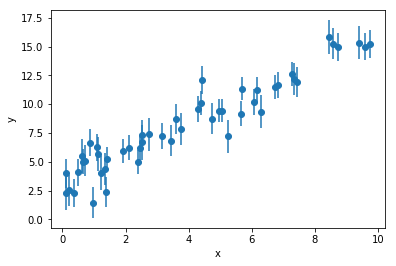

In [5]:
plt.errorbar(data, y,yerr=yerr, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
#def model(x):
#    m,b=x
#    y = m*x + b
#    return y

In [7]:
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    return -0.5*(np.sum((y-model)**2 + np.log(2.*np.pi*yerr**2)))

In [8]:
plist = [0.0,5.0,0.0,5.0]

In [9]:
def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf

In [10]:
def posti(theta, x, y, yerr):
    lp = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [11]:
sigma_m = 0.1
sigma_b = 0.3

In [12]:
x = data
NS = 1000#Numero de pasos
Nc = 10#Numero de cadenas
paso_i = [1.3,3.1]
cadena = []#Guardara datos de cadena
pcadena = []

In [13]:
def mc(pasos, sigma_m,sigma_b, paso_inicial):
    cadena = []
    pcadena = []
    theta_old = [m_i,b_i]
    for i in range(NS):
        m_new = np.random.normal(m_i,sigma_m)
        b_new = np.random.normal(b_i,sigma_b)
        theta_new = [m_new, b_new]
        p_new = lnlike(theta_new, x, y, yerr)
        p_old = lnlike(theta_old,x, y, yerr)
        #p = lnprior(m_new,b_new)
        p_n = np.exp(p_new - p_old)
        p_n = min(1., p_n)
        if (p_new/p_old>1):
            theta_old = theta_new
        else:
            r = np.random.uniform(0.,1.)
            if (p_n >= r):
                theta_old = theta_new
                cadena.append(theta_new)
                pcadena.append(p_new)
            else:
                cadena.append(theta_old)
                pcadena.append(p_old)
    cadena = np.array(cadena)
    pcadena = np.array(pcadena)
    return cadena, pcadena

In [14]:
cad = []
pcad = []
w = []

In [15]:
for i in range(Nc):
    if (i==0):
        m = m_i
        b = b_i
    elif (i>=1):
        m_in = np.random.uniform(0.,1.)
        b_in = np.random.uniform(0.,1.)
    cad,pcad = mc(NS, sigma_m,sigma_b, paso_i)

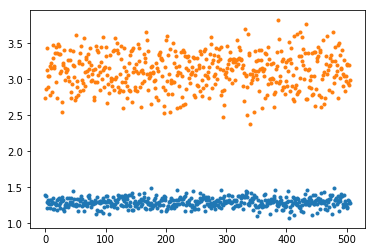

In [16]:
plt.plot(cad, '.')

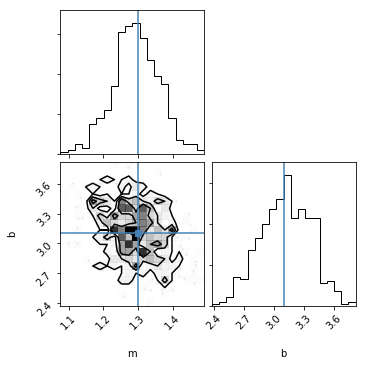

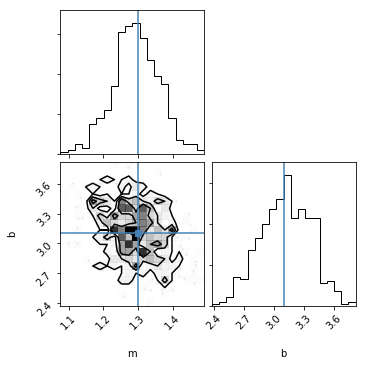

In [17]:
corner.corner(cad, labels=['m','b'],truths=[m_i, b_i])